In [11]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

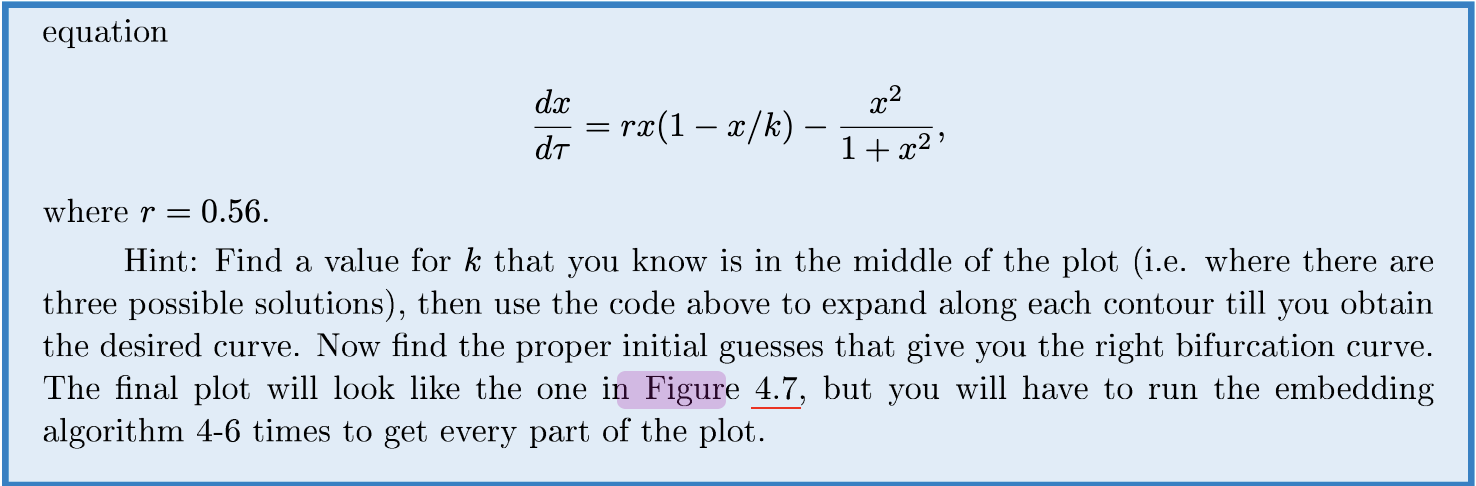

In [12]:
def simple_hysteresis_ode(t,x,r,k):
    return r*(1-x/k)- x / (1+x**2)

Descriminant of simple hysteresis ode model

$$r (1-\frac{x}{k}) - \frac{x}{1+x^2} = 0$$
$$x = r(1+x^2)(1-\frac{x}{k})$$
$$x = r(1 - \frac{x}{k} + x^2 - \frac{x^3}{k})$$
$$0 = r - \frac{r+k}{k}x + rx^2 -r\frac{x^3}{k}$$
$$\frac{r}{k}x^3 - rx^2 + \frac{k+r}{k}x - r=0$$

In [ ]:
def descriminant(k,r):
    """
    ax^3 + bx^2 + cx + d = 0
    https://en.wikipedia.org/wiki/Cubic_equation
    """
    a = r/k
    b = -r
    c = (k+r)/k
    d = -r
    p = (3*a*c-b**2) / (3*a**2)
    q = (2*b**3 - 9*a*b*c+27*a**2*d) / (27*a**3)

    return - (4*p**3 + 27*q**2)

In [ ]:
from sympy import symbols, Eq, solve, simplify

r, k = symbols('r k', positive=True)
a = r/k
b = -r
c = (k+r)/k
d = -r
p = (3*a*c-b**2) / (3*a**2)
q = (2*b**3 - 9*a*b*c+27*a**2*d) / (27*a**3)

D = - (4*p**3 + 27*q**2)
D = simplify(D)


D_fixed = D.subs(r, 0.56)
r1, r2 = solve(Eq(D_fixed, 0), k)


In [15]:
r1,r2

(6.44569072482332, 9.93441120446710)

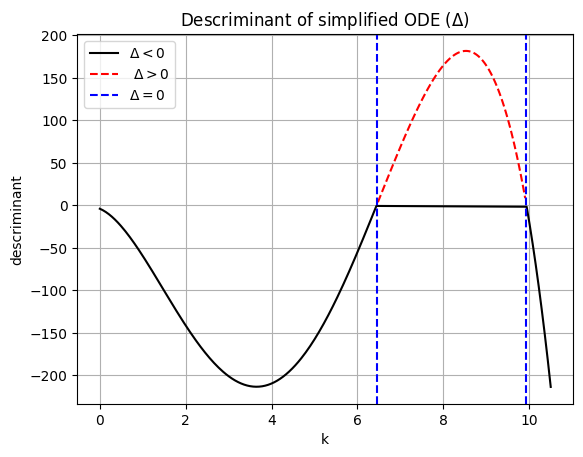

In [21]:
k = np.linspace(0+1e-15, 10.5, 301)
# k = np.linspace(-10.5,0-1e-15, 301)
des = np.array([descriminant(ki, r=0.56) for ki in k])

one_root = np.where(des<0)
three_root = np.where(des >=0)

# print(one_root)



plt.plot(k[one_root],des[one_root], c='black', label=r'$\Delta < 0$')
plt.plot(k[three_root],des[three_root], linestyle='--', c='red', label=r' $\Delta > 0$')
plt.axvline(r1, linestyle='--', c='blue', label=r'$\Delta=0$')
plt.axvline(r2, linestyle='--', c='blue')
plt.title(r"Descriminant of simplified ODE ($\Delta$)")
plt.xlabel("k")
plt.ylabel("descriminant")
plt.legend()
plt.grid(True)
plt.show()

for $k \in \text{supp}(\Delta > 0)$ the dynamical system exhibits 3 equilibria

where $\text{supp}(\Delta > 0) = [6.44569072482332,9.93441120446710]$ for $r=0.56$

In [55]:
x0=1.7
t_span = [0,150]
t_eval = np.linspace(t_span[0],t_span[-1],501)
r=0.56
k=8
sol  = solve_ivp(simple_hysteresis_ode,t_span, [x0], args=(r,k,),t_eval=t_eval)

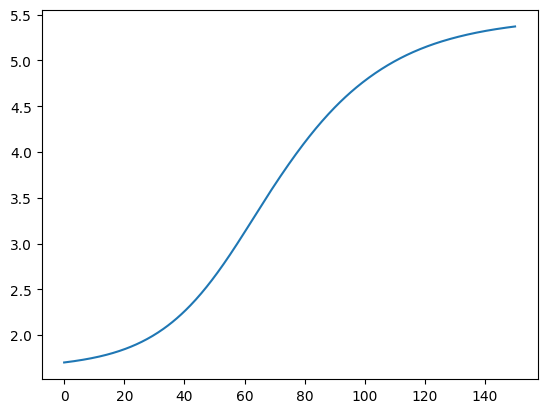

In [56]:
plt.plot(sol.t,sol.y[0])
plt.show()

In [54]:
sol.y[0][-10:]

array([0.8983454 , 0.89834089, 0.89833645, 0.89833204, 0.89832759,
       0.89832304, 0.89831832, 0.89831338, 0.89830815, 0.89830255])